# 4. Merging Ordered and Time-Series Data

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.


# Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd

# Instructions:

- Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.
- Print gdp_sp500 and look at the returns for the year 2018.

In [3]:
import pandas as pd
gdp = pd.read_csv('gdp1.csv')
gdp.columns = gdp.columns.str.lower()
sp500 = pd.read_csv('S&P500.csv')
sp500.columns = sp500.columns.str.lower()

# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', how = 'left')

# Print gdp_sp500
print(gdp_sp500)

     country name country code     indicator name  year           gdp    date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

- Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.

In [4]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', how = 'left',  fill_method = 'ffill')


# Print gdp_sp500
print (gdp_sp500)

     country name country code     indicator name  year           gdp  date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012   
11  United States          USA  GDP (current US$)  2

- Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
- Print the correlation matrix of the gdp_returns table using the .corr() method.

In [5]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', 
                             how = 'left',  fill_method = 'ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']]
gdp_returns = gdp_returns.astype(float)

# Print gdp_returns correlation
print(gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.040669
returns  0.040669  1.000000


# Phillips curve using merge_ordered()

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.

# Instructions:

- Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
- Print the inflation_unemploy variable.
- Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


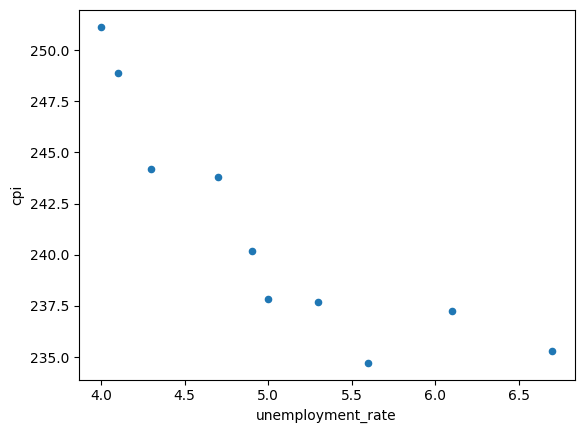

In [6]:
import matplotlib.pyplot as plt
inflation = pd.read_csv('inflation.csv')
unemployment = pd.read_csv('unemployment.csv')

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, 
                                      on = 'date', how = 'inner')
# Print inflation_unemploy 
print(inflation_unemploy)


# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind = 'scatter', x = 'unemployment_rate', y = 'cpi')
plt.show()

# merge_ordered() caution, multiple columns

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables gdp and pop have been loaded.

# Instructions:

- Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.

In [7]:
gdp = pd.read_csv('gdp2.csv')
pop = pd.read_csv('pop1.csv')

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on = ['date','country'], fill_method = 'ffill')


# Print ctry_date
print(ctry_date)

          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3   1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5   1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7   1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9   1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10  1991-04-01  Australia  155989.033  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11  1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL

- Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.

In [8]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on = ['country','date'], fill_method = 'ffill')


# Print date_ctry
print(date_ctry)

          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5   1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6   1991-07-01  Australia  156635.858  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7   1991-09-01  Australia  156744.057  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8   1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9   1992-04-01  Australia  159047.827  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10  1992-07-01  Australia  160658.176  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11  1992-09-01  Australia  163960.221  NYGDPMKTPSAKD  17495000   SP.POP.TOTL

# Using merge_asof() to study stocks

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.

# Instructions:

- Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
- Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
- Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.

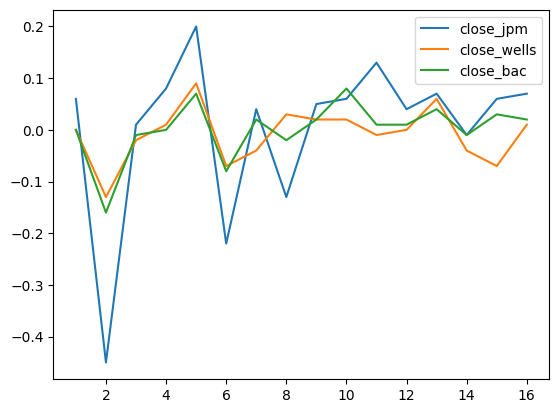

In [12]:
jpm = pd.read_csv('jpm.csv')
jpm["date_time"] = pd.to_datetime(jpm["date_time"])
wells = pd.read_csv('wells.csv')
wells["date_time"] = pd.to_datetime(wells["date_time"])
bac = pd.read_csv('bac.csv')
bac["date_time"] = pd.to_datetime(bac["date_time"])

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on = 'date_time', 
                          suffixes = ('', '_wells'), direction = 'nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = 'date_time', 
                              suffixes = ('_jpm', '_bac'), direction = 'nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y = ['close_jpm','close_wells','close_bac'])
plt.show()

# Using merge_asof() to create dataset

The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables gdp and recession have been loaded for you.

# Instructions:

- Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
- Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
- Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

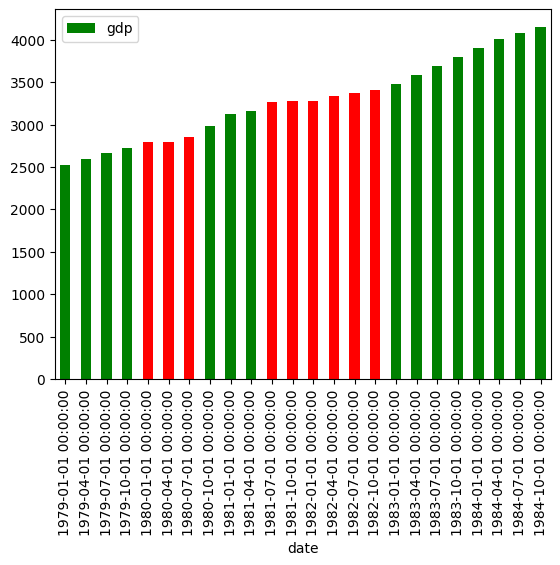

In [17]:
gdp = pd.read_csv('gdp3.csv')
gdp["date"] = pd.to_datetime(gdp["date"])
recession = pd.read_csv('recession.csv')
recession["date"] = pd.to_datetime(recession["date"])

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on = 'date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind = 'bar', y = 'gdp', x = 'date', color = is_recession, rot = 90)
plt.show()

# Explore financials with .query()

You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the .query() method and the IPython shell to explore social_fin and select the True statement.

# Instructions:

Possible answers

( ) There 2 rows where the value is greater than $50,000,000K.

( ) There are 3 rows for total revenue for Facebook.

(x) There are 6 rows where the net income has a negative value.

( ) There are 45 rows, where the gross profit is greater than $100K.

# Subsetting rows with .query()

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

# Instructions:

- Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.

In [19]:
gdp = pd.read_csv('gdp4.csv')
gdp["date"] = pd.to_datetime(gdp["date"])
pop = pd.read_csv('pop2.csv')
pop["date"] = pd.to_datetime(pop["date"])

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')


- Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.

In [20]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on = ['country','date'], fill_method = 'ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']


- Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.

In [21]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on = ['country','date'], fill_method = 'ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

- Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.

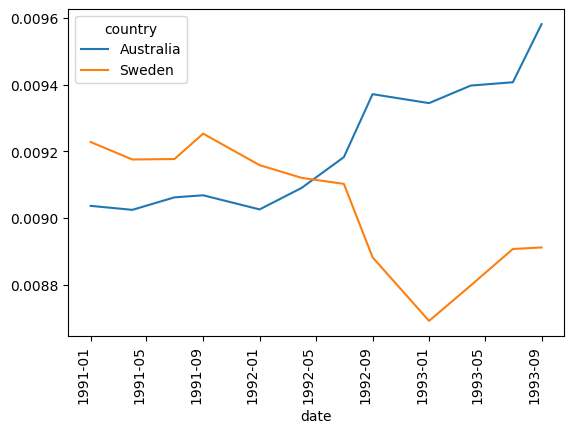

In [22]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on = ['country','date'], fill_method = 'ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot = 90)
plt.show()

# Select the right .melt() arguments

You are given a table named inflation. Chose the option to get the same output as the table below.

   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66

# Possible answers

( ) inflation.melt(id_vars=['country','indicator'], var_name='annual')

( ) inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')

(x) inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

( ) inflation.melt(id_vars=['country'], var_name='year', value_name='annual')

# Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the IPython shell before beginning the exercise.

# Instructions:

- Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.
- Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
- Sort ur_tall by date and save as ur_sorted.
- Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

In [ ]:
ur_wide = pd.read_csv('ur_wide.csv')

# Unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars = ['year'], var_name = 'month', value_name = 'unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x = 'date', y = 'unempl_rate')
plt.show()

# Using .melt() for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.

# Instructions:

- Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
- Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
- Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
- Using dow_bond, plot only the Dow and bond values.

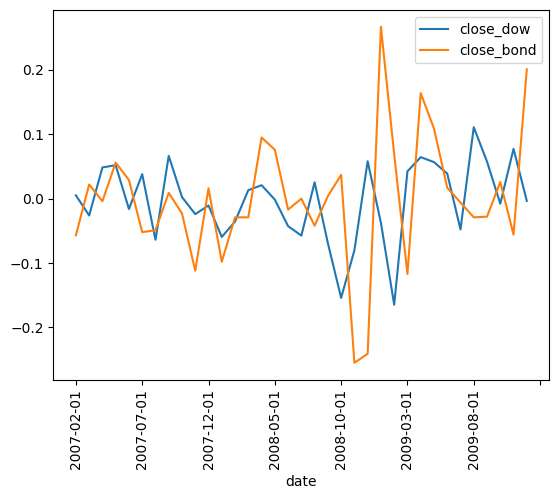

In [30]:
ten_yr = pd.read_csv('ten_yr.csv')
dji = pd.read_csv('dji.csv')

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = 'metric', var_name = 'date', value_name = 'close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on = 'date', 
                            suffixes = ('_dow', '_bond'), how = 'inner')


# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ['close_dow', 'close_bond'], x = 'date', rot = 90)
plt.show()